In [ ]:
# prompt: code pour monter le drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Specialisation_ressource/Cours1/clients.csv')
df.tail() # la fonction tail() selectionne par defaut 05 derniers elements de notre daatframe
df.iloc[0,2]

'Laurent Dagenais'

In [ ]:
dfjs=pd.read_json('/content/drive/MyDrive/Specialisation_ressource/Cours1/clients.json')
dfjs.head()

,identifiant,email,nom,genre
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,GuyMarois@fleckens.hu,Guy Marois,M
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M
3,3,RussellDurand@armyspy.com,Russell Durand,M
4,4,AlexisRiel@rhyta.com,Alexis Riel,M


In [ ]:
dfexel=pd.read_excel('/content/drive/MyDrive/Specialisation_ressource/Cours1/clients.xlsx')
# dfexel.head()
# dfexel.values
# type(dfexel['genre'])
dfexel.rename(columns={'identifiant':'ID'}, inplace=True)
dfexel.head()

,ID,email,nom,genre
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,GuyMarois@fleckens.hu,Guy Marois,M
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M
3,3,RussellDurand@armyspy.com,Russell Durand,M
4,4,AlexisRiel@rhyta.com,Alexis Riel,M


# Quizz2

In [ ]:
note=pd.read_csv('/content/drive/MyDrive/Specialisation_ressource/Cours1/notes.csv')
note.head()

,nom,matiere,note
0,Laurent Dagenais,Français,16
1,Guy Marois,Français,13
2,Beaufort Lesage,Français,8
3,Russell Durand,Français,10
4,Alexis Riel,Français,15


In [ ]:
# prompt: En utilisant les différentes méthodes/fonctions explorées dans cette partie, calculez la moyenne de la classe en mathématiques.
# Quelle est la valeur arrondie à 2 chiffres après la virgule ?

# Calculate the mean of the "math" column using different methods

moyen= note.loc[note['matiere']=='Mathématiques',['note']].sum()/len(note.loc[note['matiere']=='Mathématiques',['note']])
rounded_mean = round(moyen, 2)

rounded_mean

note    11.33
dtype: float64

In [ ]:

moyennes_par_eleve = note.groupby('nom')['note'].mean().reset_index()

# Count students with average below 10
nb_etudiants_sans_moyenne = len(moyennes_par_eleve.loc[moyennes_par_eleve['note'] < 10])

print(nb_etudiants_sans_moyenne)


6


In [ ]:
note.loc[((note['matiere'] == 'Mathématiques') | (note['matiere'] == 'Physique/Chimie')) & (note['note'] >= 15), 'nom']


22         Guy Marois
23    Beaufort Lesage
28     Agramant Pepin
30    Theodore Clavet
31     Byron Lefebvre
32       Florus Devoe
65    Beaufort Lesage
68      Leon Lapresse
70     Agramant Pepin
74       Florus Devoe
78    Agate Grandbois
81     Yseult Charest
82     Dorothee Aupry
Name: nom, dtype: object

In [ ]:
note.pivot_table(index='nom', columns='matiere', values='note')

matiere,Biologie,Français,Mathématiques,Physique/Chimie
nom,,,,
Aceline Hughes,15,12,13,10
Agate Grandbois,19,12,9,17
Agramant Pepin,6,17,18,16
Agrican Foucault,14,10,13,9
Aiglentina Lambert,7,16,6,5
Alexis Riel,5,15,5,11
Amaury Reault,7,8,11,8
Beaufort Lesage,8,8,15,18
Byron Lefebvre,15,13,19,8


In [ ]:
commande=pd.read_csv('/content/drive/MyDrive/Specialisation_ressource/Cours1/commande.csv')
commande.head()


,id,nombre
0,70,2
1,41,4
2,72,2
3,92,8
4,73,1


In [ ]:
produit=pd.read_csv('/content/drive/MyDrive/Specialisation_ressource/Cours1/produits.csv')
produit.head()

,id,prix
0,0,24.8
1,1,13.1
2,2,23.7
3,3,16.0
4,4,19.0


In [ ]:
merged=pd.merge(commande, produit, on='id')
merged.head()

,id,nombre,prix
0,70,2,17.6
1,70,9,17.6
2,70,5,17.6
3,70,5,17.6
4,70,8,17.6


In [ ]:
quantite_sold=merged.groupby('id')['nombre'].sum()
quantite_sold

id
0     47
1     49
2     39
3     34
4     45
      ..
95    24
96    45
97    48
98    84
99    76
Name: nombre, Length: 100, dtype: int64

In [ ]:
most_sold=quantite_sold.idxmax()
most_sold

8

In [ ]:
merged['toatl']=merged['nombre']*merged['prix']
merged.head()

,id,nombre,prix,toatl
0,70,2,17.6,35.2
1,70,9,17.6,158.4
2,70,5,17.6,88.0
3,70,5,17.6,88.0
4,70,8,17.6,140.8


In [ ]:
toatl_revenu= merged.groupby('id')['toatl'].sum()
toatl_revenu

id
0     1165.6
1      641.9
2      924.3
3      544.0
4      855.0
       ...  
95     508.8
96     846.0
97     427.2
98    1680.0
99     896.8
Name: toatl, Length: 100, dtype: float64

In [ ]:
least_revenu=toatl_revenu.idxmin()
least_revenu

58

In [ ]:
prets = pd.read_csv("https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets.csv")
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


# Tracons les graphique avec mathplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# prets.rename(columns={'taux ':'taux_interet'}, inplace=True)

In [ ]:
prets["taux_endettement"] = round(prets["remboursement"] / prets["revenu"] * 100, 2)
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux,cout_total,benefices,taux_endettement
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,271212.0,13198.98,30.80
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,15360.0,2368.64,4.52
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,374355.0,18296.60,23.50
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,132609.6,5370.69,29.50
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,105485.4,4456.76,34.80


In [ ]:

# Now calculate the 'benefices' column
prets["cout_total"] = prets["remboursement"] * prets["duree"]
prets["benefices"] = round(prets["cout_total"] * prets["taux"] / 24, 2)

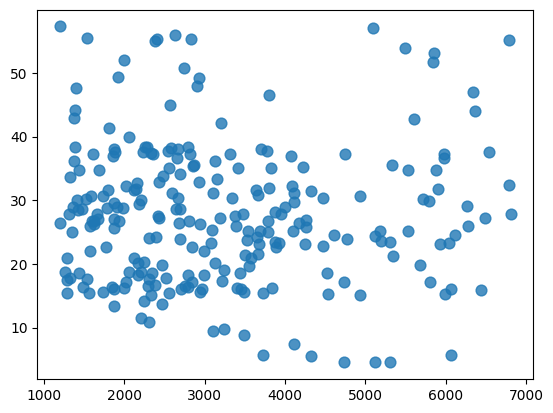

In [ ]:
plt.scatter(prets['revenu'],prets['taux_endettement'],s=60, alpha=0.8)

In [ ]:
data= prets.groupby('ville')[['remboursement']].sum()
data=data.reset_index()
data.head()

,ville,remboursement
0,BORDEAUX,15330.59
1,LYON,26064.67
2,MARSEILLE,40895.72
3,NICE,23544.24
4,PARIS,94052.61


([<matplotlib.patches.Wedge at 0x7b8a0cadaa70>,
 [Text(1.0735482898052735, 0.2397792098080497, 'BORDEAUX'),
  Text(0.7559779933342196, 0.7990602440331811, 'LYON'),
  Text(-0.22079479320563614, 1.0776129450286316, 'MARSEILLE'),
  Text(-0.9928563505107825, 0.4735359197045252, 'NICE'),
  Text(-0.3566773649937175, -1.0405677571889005, 'PARIS'),
  Text(1.0582353655336645, -0.30022976390396683, 'TOULOUSE')])

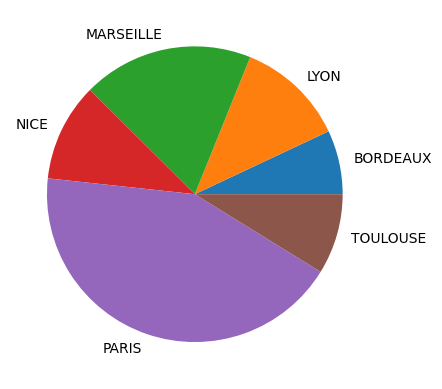

In [ ]:
plt.pie(x=data['remboursement'],labels=data['ville'])

<BarContainer object of 6 artists>

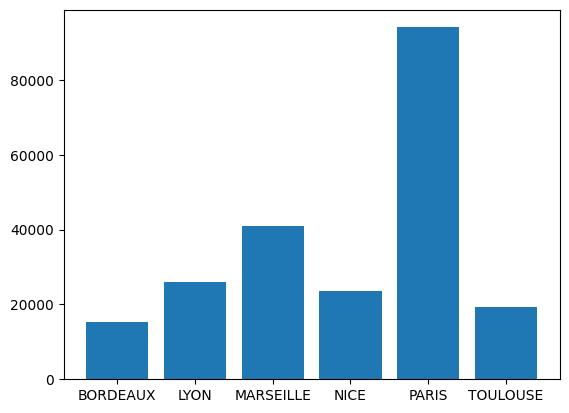

In [ ]:
plt.bar(height=data['remboursement'],x=data['ville'])

<BarContainer object of 6 artists>

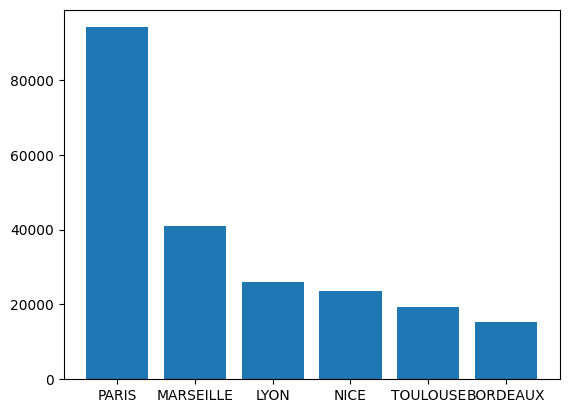

In [ ]:
data_sorted= data.sort_values(by='remboursement',ascending=False)
plt.bar(height=data_sorted['remboursement'],x=data_sorted['ville'])

<Axes: xlabel='revenu', ylabel='taux_endettement'>

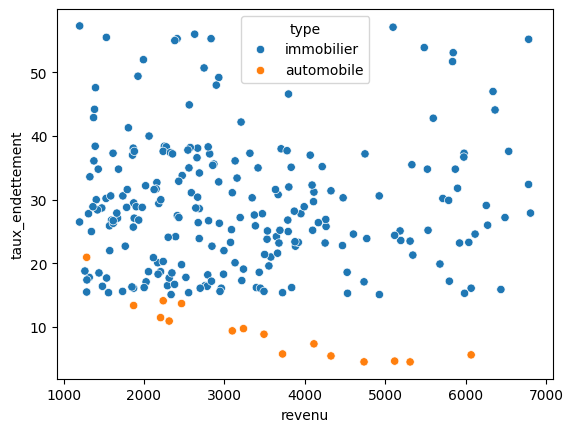

In [ ]:
sns.scatterplot(data=prets, x='revenu', y='taux_endettement',hue='type')

# print(prets.columns)

<ipython-input-18-e547bd47501f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prets, x='ville', y='remboursement', ci=None,estimator=sum)


<Axes: xlabel='ville', ylabel='remboursement'>

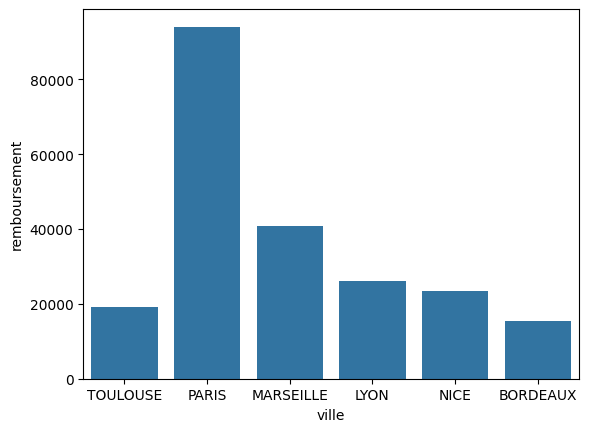

In [ ]:
sns.barplot(data=prets, x='ville', y='remboursement', ci=None,estimator=sum)

<ipython-input-19-3acb70484982>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prets, x='ville', y='remboursement', ci=None,estimator=np.mean,hue='type')


<Axes: xlabel='ville', ylabel='remboursement'>

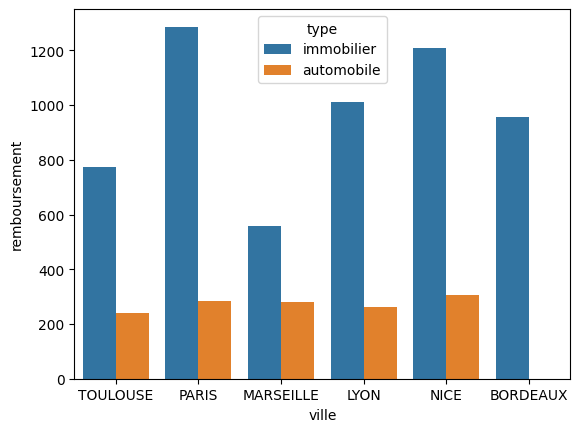

In [ ]:
sns.barplot(data=prets, x='ville', y='remboursement', ci=None,estimator=np.mean,hue='type')


In [ ]:
iris = sns.load_dataset('iris')

<ipython-input-22-bdd74c2aa2ed>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=iris, x='species', y='petal_width', ci=None,estimator=np.mean)


<Axes: xlabel='species', ylabel='petal_width'>

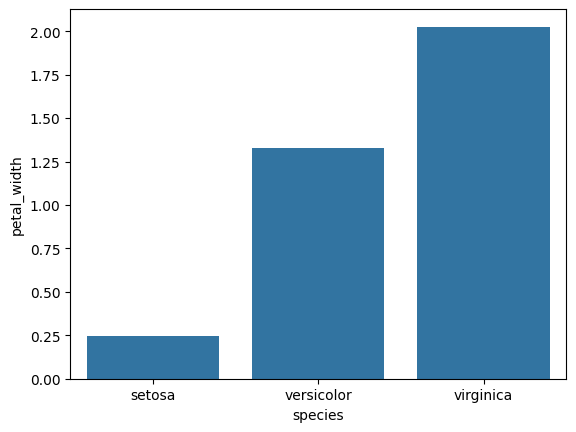

In [ ]:
sns.barplot(data=iris, x='species', y='petal_width', ci=None,estimator=np.mean)

In [ ]:
mpg= sns.load_dataset('mpg')

<Axes: xlabel='horsepower', ylabel='mpg'>

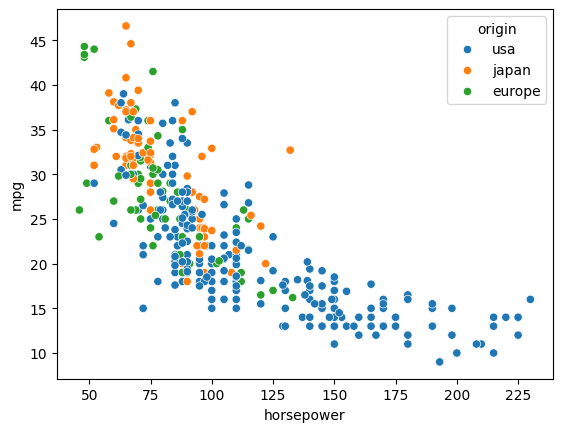

In [ ]:
sns.scatterplot(data=mpg, x='horsepower', y='mpg', hue='origin')

ValueError: could not convert string to float: 'usa'

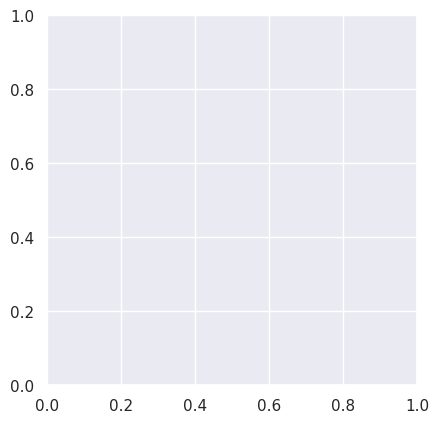

In [ ]:
sns.set_theme()
origin_count = mpg['origin'].value_counts().reset_index()
plt.pie(labels=origin_count['count'], x=origin_count['origin'], autopct='%.1f%%')